In [2]:
#first of all lets import some important libraries to use in coding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Lets import the dataset and read the dataset
house_data=pd.read_csv("train.csv")
house_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house_data.tail()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
house_data.shape


(1460, 81)

In [7]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#lets find some duplicates in dataset
sum(house_data.duplicated(subset='Id'))==0


True

This concludes that there are no duplicates in the dataset.



# Missing Data


In [10]:
#Lets check for NaN valuse in the dataset
house_data.isnull().values.any()


True

In [11]:
house_data.isnull().values.sum()


6965

In [12]:
#checking NA columnwise
missing_values=(house_data.isnull().sum()).sort_values(ascending=False)
missing_values


PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [13]:
#exact list of columns with missing values
missing_columns=missing_values[missing_values>0]
missing_columns


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [14]:
print('Total no. of columns with missing values: ',missing_columns.count())


Total no. of columns with missing values:  19


# Missing Data Imputation
Now time to impute columns missing data using the data given in dictionary of data understanding text file.



In [15]:
# Imputing categorical variables
house_data['PoolQC'].fillna('No Pool', inplace=True)
house_data['MiscFeature'].fillna('None', inplace=True)
house_data['Alley'].fillna('No alley access', inplace=True)
house_data['Fence'].fillna('No Fence', inplace=True)
house_data['FireplaceQu'].fillna('No Fireplace', inplace=True)
house_data['GarageCond'].fillna('No Garage', inplace=True)
house_data['GarageType'].fillna('No Garage', inplace=True)
house_data['GarageFinish'].fillna('No Garage', inplace=True)
house_data['GarageQual'].fillna('No Garage', inplace=True)
house_data['BsmtExposure'].fillna('No Basement', inplace=True)
house_data['BsmtFinType2'].fillna('No Basement', inplace=True)
house_data['BsmtFinType1'].fillna('No Basement', inplace=True)
house_data['BsmtCond'].fillna('No Basement', inplace=True)
house_data['BsmtQual'].fillna('No Basement', inplace=True)
house_data['MasVnrType'].fillna('None', inplace=True)
house_data['Electrical'].fillna('Mix', inplace=True)

# Imputing numerical variables

# There are good chances of a house having LotFrontage similar to other houses in the neighborhood,
# so let's impute LotFrontage based on this assumption
house_data["LotFrontage"] =house_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Since there are equal number of missing MasVnrType and MasVnrArea and we have filled MasVnrType with None,
# so let's impute MasVnrArea with '0' value
house_data['MasVnrArea'].fillna(0, inplace=True)

In [16]:
# Lets drop some more unimportant columns from the dataset based on the dictionary of dataset
house_data.drop('GarageYrBlt',axis=1,inplace=True)


In [17]:
house_data.drop('Id',axis=1,inplace=True)


In [18]:
# check again for NA values in cloumns
house_data.isnull().sum().sort_values(ascending=False)


MSSubClass      0
BedroomAbvGr    0
GarageType      0
FireplaceQu     0
Fireplaces      0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 79, dtype: int64

In [19]:
#check again the shape of Dataframe
house_data.shape


(1460, 79)

In [20]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
# There are some variables that should be in categorical
house_data['MSSubClass']=house_data['MSSubClass'].astype('object')
house_data['OverallQual']=house_data['OverallQual'].astype('object')
house_data['OverallCond']=house_data['OverallCond'].astype('object')
house_data['MoSold']=house_data['MoSold'].astype('object')
house_data['YrSold']=house_data['YrSold'].astype('object')
house_data['YearBuilt']=house_data['YearBuilt'].astype('object')
house_data['YearRemodAdd']=house_data['YearRemodAdd'].astype('object')


In [22]:
house_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [23]:
house_data.describe()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


In [24]:
# Lets create total number of bathrooms in a house
house_data['Total Bathrooms']=((house_data['BsmtFullBath'])+(house_data['FullBath'])+(house_data['BsmtHalfBath']/2)+(house_data['HalfBath']/2))


In [25]:
# Lets get total surface area of house
house_data['Total SF']=(house_data['TotalBsmtSF']
                       +house_data['1stFlrSF']+house_data['2ndFlrSF'])


In [26]:
house_data.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total Bathrooms,Total SF
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,No Fence,None,0,2,2008,WD,Normal,208500,3.5,2566
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,No Fence,None,0,5,2007,WD,Normal,181500,2.5,2524
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,No Fence,None,0,9,2008,WD,Normal,223500,3.5,2706
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,No Fence,None,0,2,2006,WD,Abnorml,140000,2.0,2473
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,No Fence,None,0,12,2008,WD,Normal,250000,3.5,3343


# Univariate Analysis
Now perform analysis on target variable - SalePrice



<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

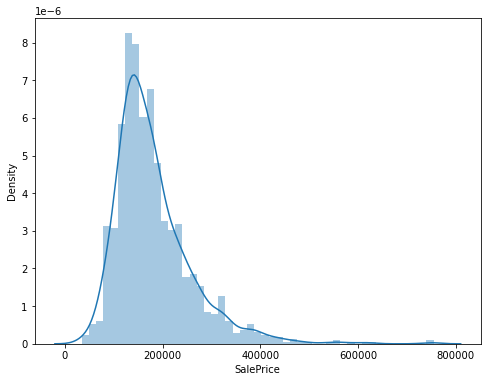

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(house_data['SalePrice'])


From the above plot we can say that majority of the houses are between 10000 and 15000 price ranges
Some houses are having very high price ranges like 800000


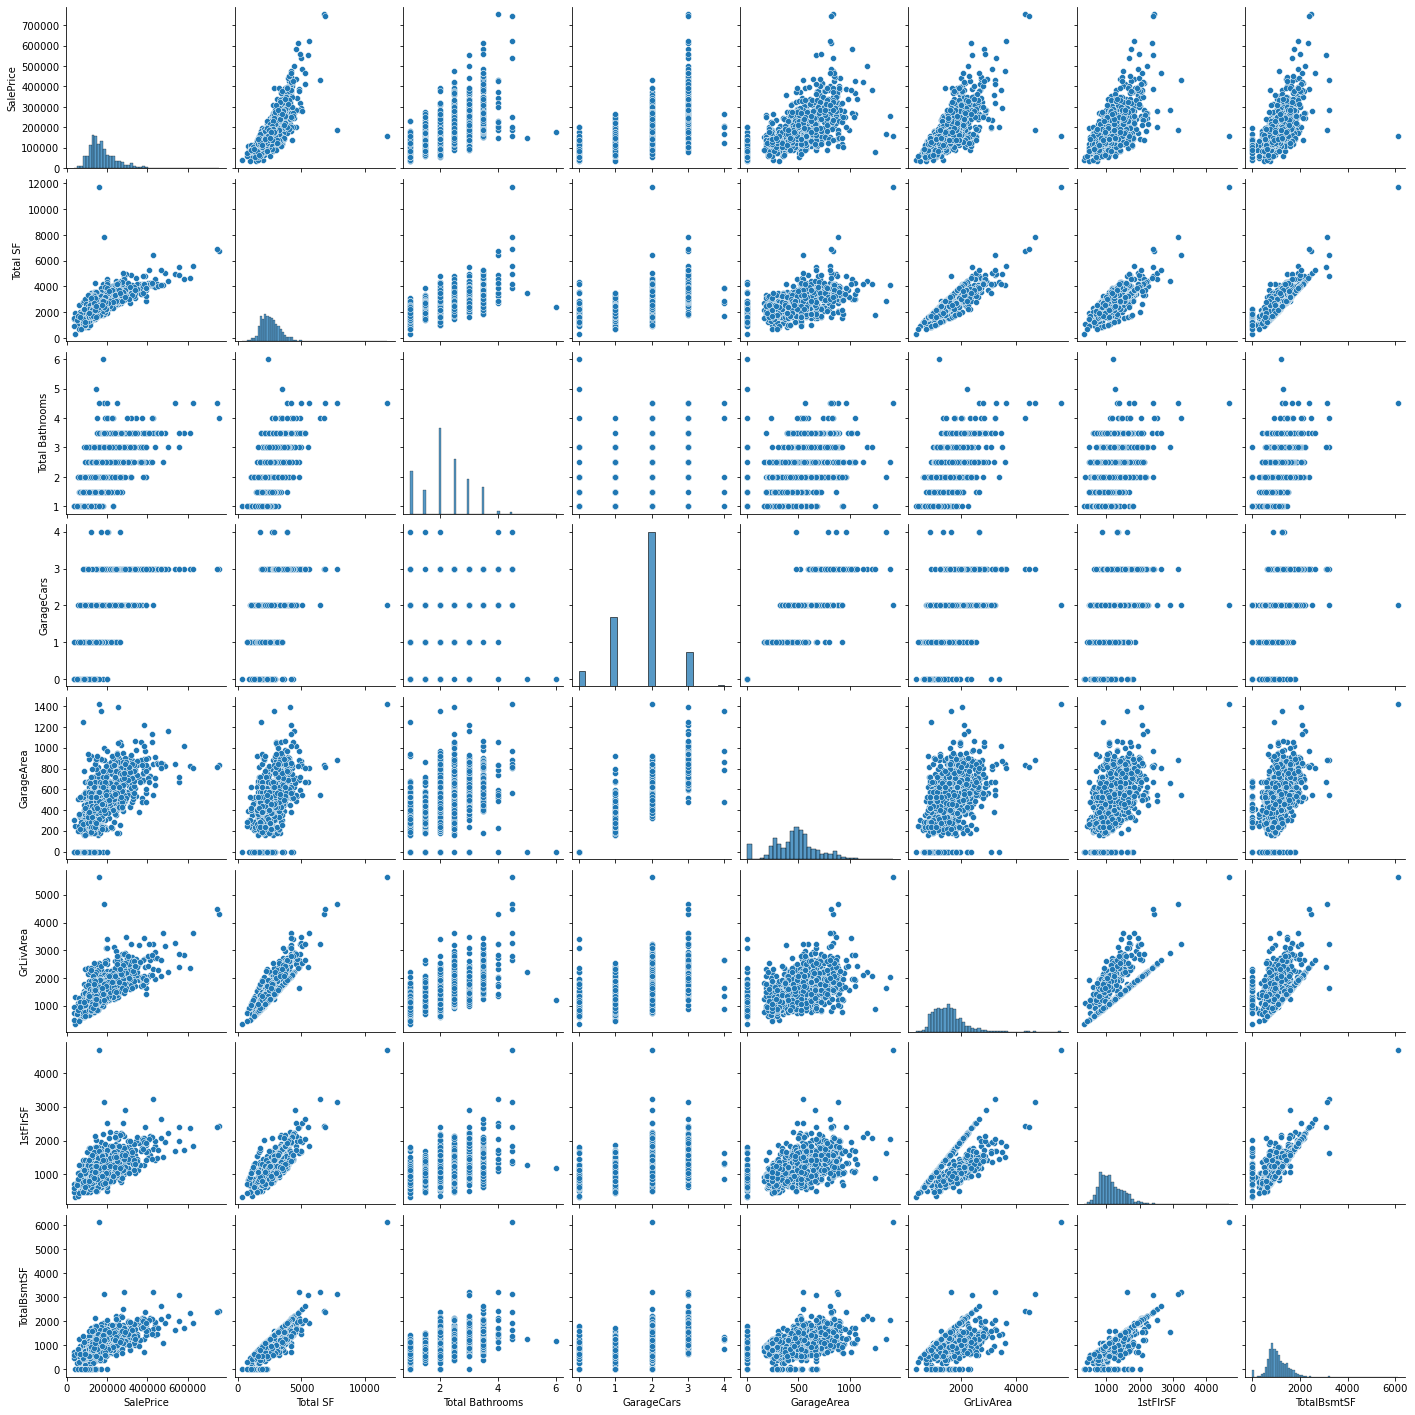

In [28]:
#lets verify the correlation of SalePrice with above variables using scatter plot
high_correlated=['SalePrice','Total SF','Total Bathrooms',"GarageCars",'GarageArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF']
sns.pairplot(house_data[high_correlated])
plt.show()


<AxesSubplot:>

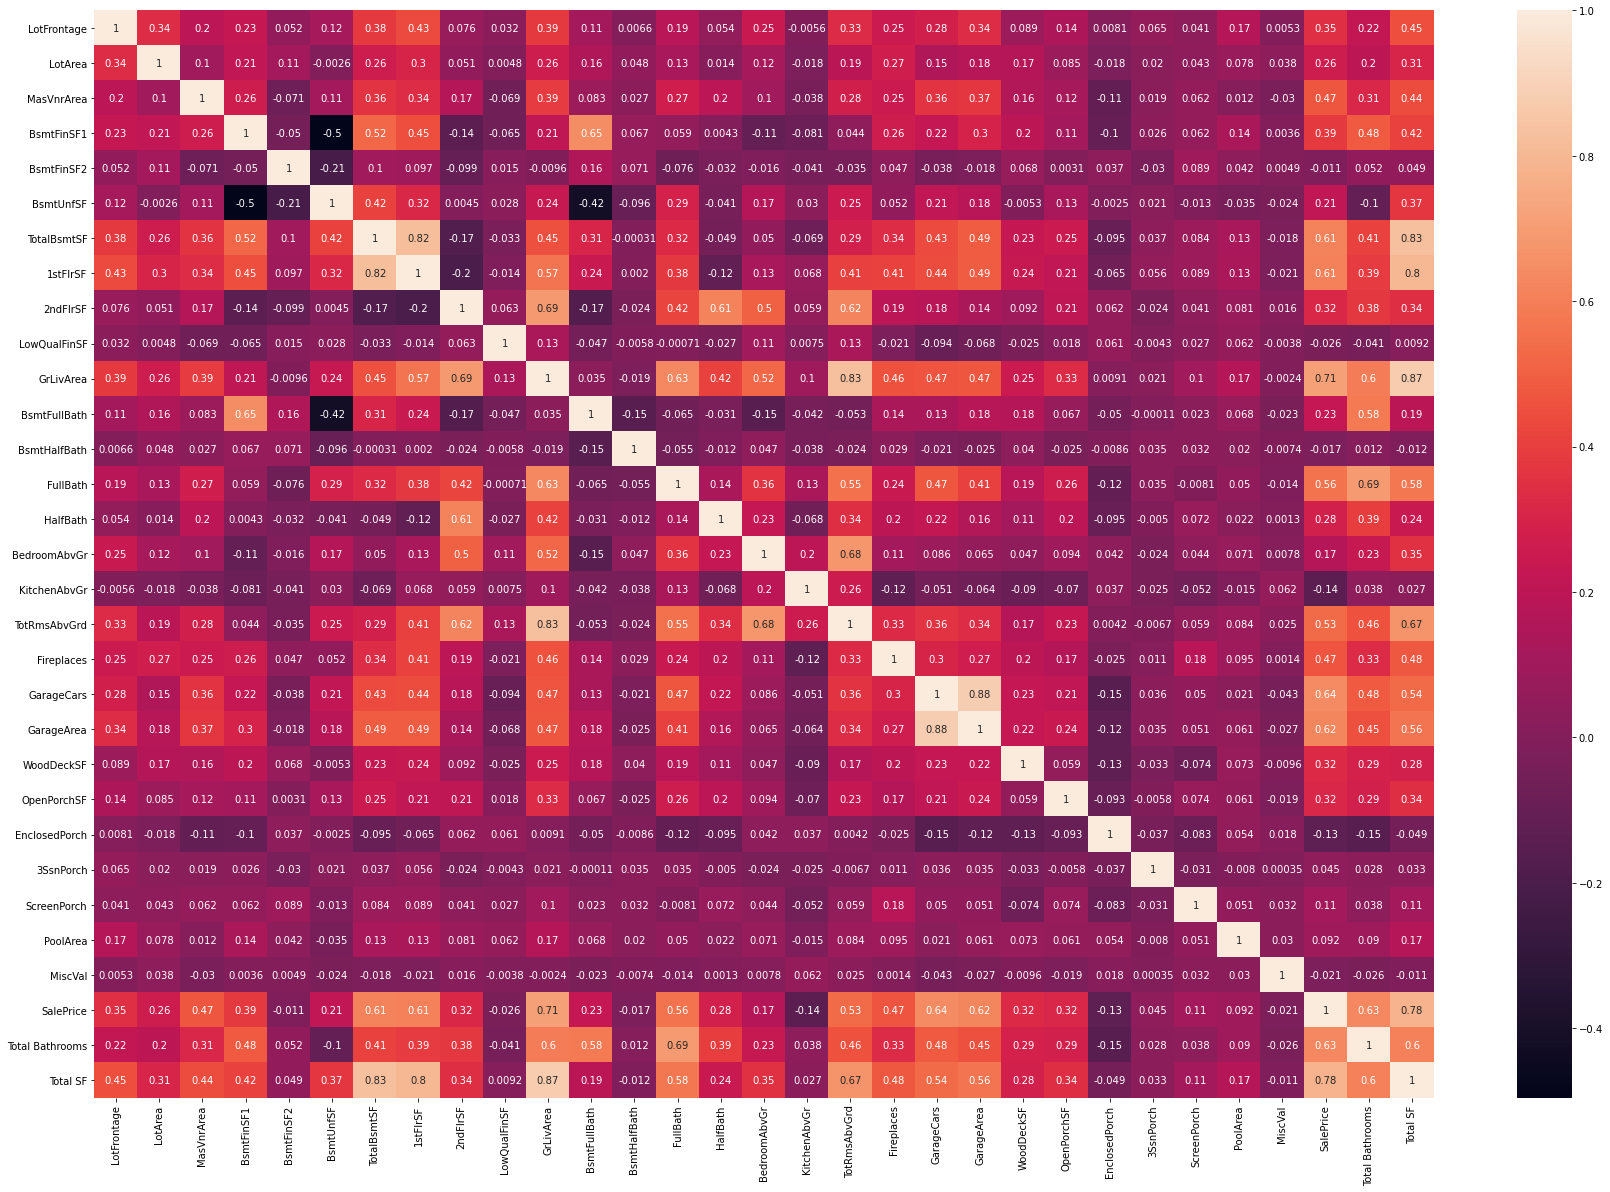

In [29]:
# Data Correlation
plt.figure(figsize=(30,20))
sns.heatmap(house_data.corr(),annot=True)


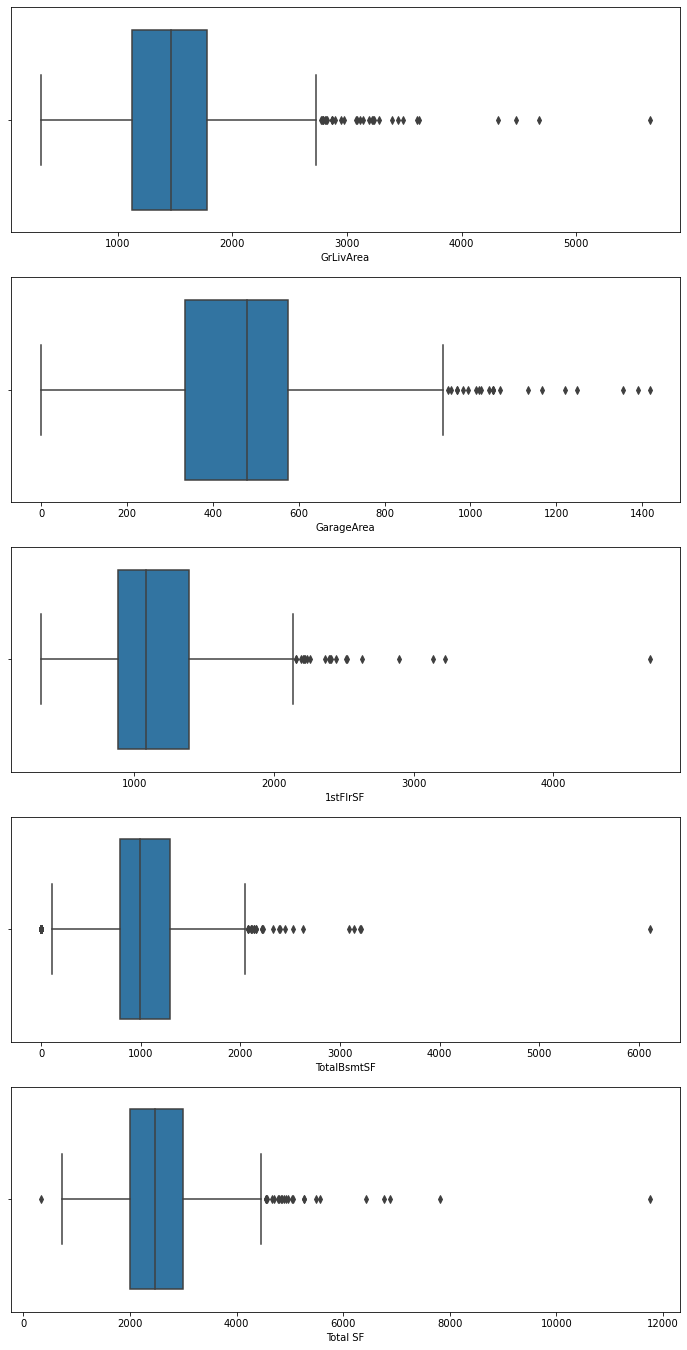

In [30]:
# check of outliers and treatment
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
a=sns.boxplot(x=house_data['GrLivArea'])

plt.subplot(5,1,2)
a=sns.boxplot(x=house_data['GarageArea'])

plt.subplot(5,1,3)
a=sns.boxplot(x=house_data['1stFlrSF'])

plt.subplot(5,1,4)
a=sns.boxplot(x=house_data['TotalBsmtSF'])

plt.subplot(5,1,5)
a=sns.boxplot(x=house_data['Total SF'])


In [31]:
# Now lets remove outliers
house_data=house_data[house_data['GrLivArea']<4000]
house_data=house_data[house_data['GarageArea']<1200]
house_data=house_data[house_data['1stFlrSF']<3000]
house_data=house_data[house_data['TotalBsmtSF']<3000]
house_data=house_data[house_data['Total SF']<6000]


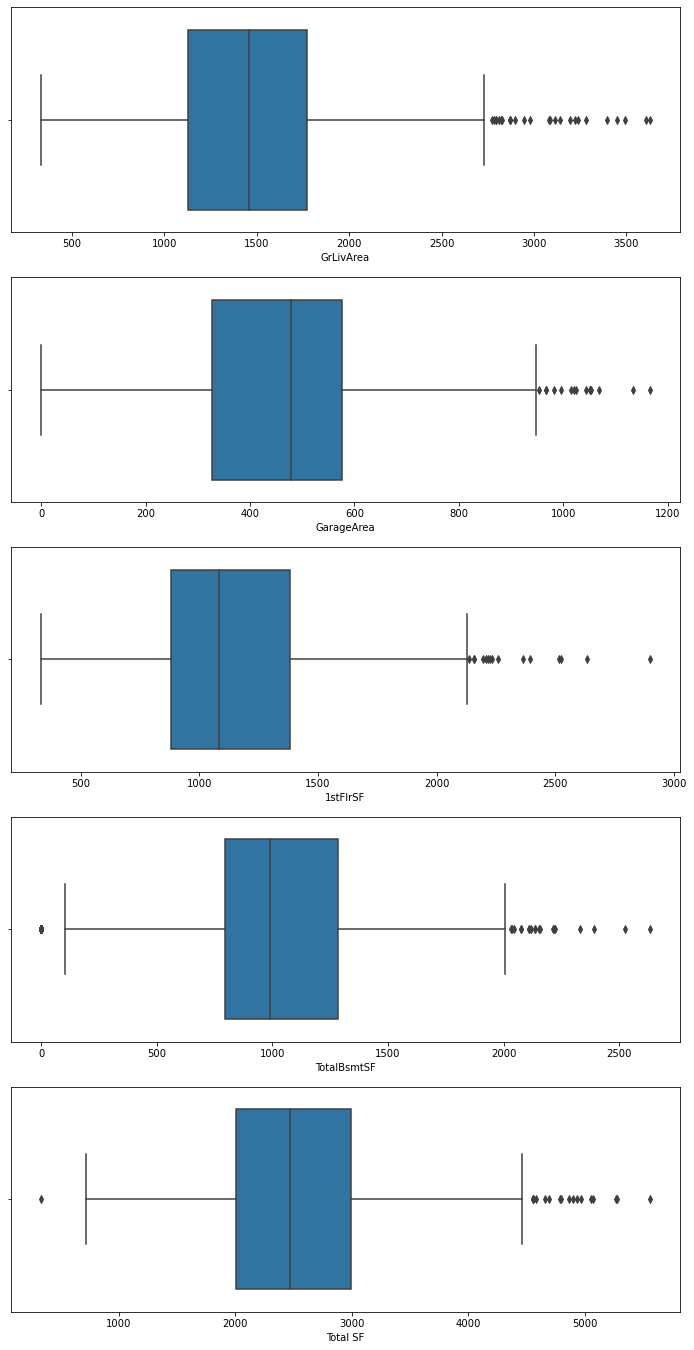

In [32]:
plt.figure(figsize=(12,24))

plt.subplot(5,1,1)
b=sns.boxplot(x=house_data['GrLivArea'])

plt.subplot(5,1,2)
b=sns.boxplot(x=house_data['GarageArea'])

plt.subplot(5,1,3)
b=sns.boxplot(x=house_data['1stFlrSF'])

plt.subplot(5,1,4)
b=sns.boxplot(x=house_data['TotalBsmtSF'])

plt.subplot(5,1,5)
b=sns.boxplot(x=house_data['Total SF'])


In [33]:
# Numerical Variables
numerical_data=house_data.select_dtypes(include=[np.number])
numerical_data.shape


(1449, 31)

In [34]:
num_vars=list(numerical_data.columns)
num_vars.remove('SalePrice')


In [35]:
X=house_data[num_vars]
y=house_data['SalePrice']


# Creating of dummy variables for categorical data


In [36]:
categorical_data=house_data.select_dtypes(exclude=[np.number])
categorical_data.shape


(1449, 50)

In [37]:
categorical_vars=list(categorical_data.columns)


In [38]:
categorical_data=pd.get_dummies(categorical_data,drop_first=True)
categorical_data.shape


(1449, 438)

In [39]:
categorical_data.head()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [40]:
categorical_data.tail()


,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
house_data=pd.concat([house_data,categorical_data],axis=1)
house_data.shape
(1449, 519)


(1449, 519)

In [42]:
house_data.drop(categorical_vars,axis=1,inplace=True)
house_data.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
house_data.shape


(1449, 469)

# Splitting the Data into Train and Test


In [44]:
train,test=train_test_split(house_data,train_size=0.8,test_size=0.2,random_state=100)


In [45]:
# Rescaling numerical variables
scaler=MinMaxScaler()
train[num_vars]=scaler.fit_transform(train[num_vars])
y_train=train.pop('SalePrice')
X_train=train


In [46]:
test[num_vars]=scaler.transform(test[num_vars])
y_test=test.pop('SalePrice')
X_test=test


In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((1159, 468), (290, 468), (1159,), (290,))

# Model Building and Evaluation
Ridge Regrssion


In [48]:
#list of the alphas to tune
params={'alpha': [0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge=Ridge()

# Cross Validation
folds=5
ridge_cv=GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
ridge_cv.fit(X_train,y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
cv_results=pd.DataFrame(ridge_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.038695,0.032520,0.007182,0.000979,0.0001,{'alpha': 0.0001},0.819057,0.847476,0.877450,0.864579,...,0.854747,0.020236,25,0.969187,0.967115,0.966973,0.966055,0.967073,0.967280,0.001030
1,0.025532,0.002054,0.006581,0.001198,0.001,{'alpha': 0.001},0.822204,0.848849,0.877961,0.867820,...,0.856437,0.019503,24,0.969186,0.967114,0.966971,0.966054,0.967072,0.967280,0.001030
2,0.028131,0.003742,0.007771,0.000977,0.01,{'alpha': 0.01},0.838892,0.855598,0.881050,0.877414,...,0.864044,0.015377,23,0.969152,0.967086,0.966934,0.966021,0.967036,0.967246,0.001030
3,0.023936,0.003397,0.007180,0.001324,0.05,{'alpha': 0.05},0.856021,0.867785,0.888214,0.889426,...,0.874757,0.012663,21,0.968891,0.966810,0.966646,0.965730,0.966724,0.966960,0.001041
4,0.022140,0.002310,0.005983,0.001093,0.1,{'alpha': 0.1},0.862873,0.875305,0.893251,0.897084,...,0.880994,0.012574,20,0.968510,0.966397,0.966211,0.965277,0.966299,0.966539,0.001064


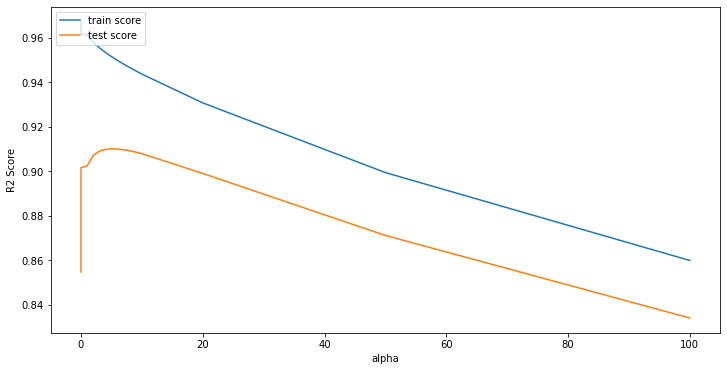

In [50]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(12,6))

cv_results['param_alpha']=cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score', 'test score'],loc='upper left')
plt.show()


In [51]:
ridge_cv.best_score_


0.9100769380248176

In [52]:
ridge_cv.best_params_


{'alpha': 5.0}

In [53]:
# Optimal value for lambda is 5
alpha=5
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


Ridge(alpha=5)

In [54]:
y_train_pred=ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)


0.9493220862549259


0.8804325477951038

In [55]:
# Optimal value for lambda is 10
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)


Ridge(alpha=10)

In [56]:
y_train_pred=ridge.predict(X_train)
print(r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred=ridge.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)


0.9429410295679598


0.8793257144914857

In [57]:
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [58]:
cv_results=pd.DataFrame(lasso_cv.cv_results_)
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.374139,0.031225,0.006382,0.001197,0.0001,{'alpha': 0.0001},0.814501,0.850758,0.871052,0.873369,...,0.853343,0.021183,26,0.969186,0.967088,0.966957,0.966027,0.967066,0.967265,0.001038
1,0.406329,0.012691,0.006382,0.001353,0.001,{'alpha': 0.001},0.814568,0.850660,0.871311,0.873383,...,0.853306,0.021193,27,0.969186,0.967088,0.966957,0.966027,0.967066,0.967265,0.001038
2,0.363451,0.019849,0.006774,0.001594,0.01,{'alpha': 0.01},0.815298,0.849830,0.873665,0.873540,...,0.853919,0.021421,25,0.969186,0.967088,0.966957,0.966027,0.967066,0.967265,0.001038
3,0.367535,0.016405,0.006981,0.000893,0.05,{'alpha': 0.05},0.816902,0.850560,0.877036,0.874213,...,0.855516,0.021631,24,0.969186,0.967086,0.966954,0.966025,0.967064,0.967263,0.001039
4,0.434126,0.090594,0.008569,0.001848,0.1,{'alpha': 0.1},0.818663,0.851504,0.878501,0.875070,...,0.856861,0.021454,23,0.969184,0.967082,0.966951,0.966022,0.967062,0.967260,0.001039


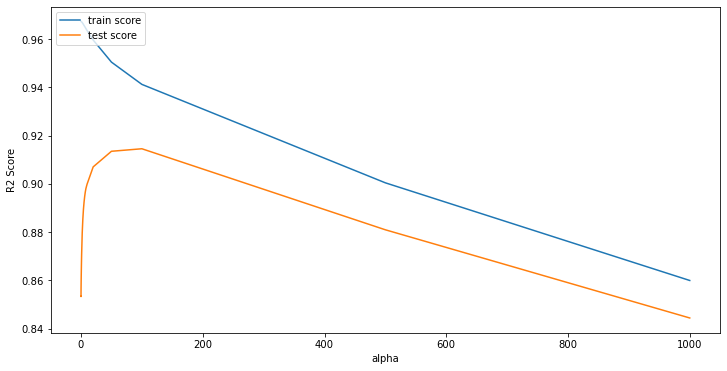

In [60]:
plt.figure(figsize=(12,6))
cv_results['param_alpha']=cv_results['param_alpha'].astype('float32')

# Now lets plot
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.legend(['train score','test score'],loc='upper left')
plt.show()


In [61]:
lasso_cv.best_score_


0.9145331142176847

In [62]:
lasso_cv.best_params_


{'alpha': 100}

In [64]:

# Optimal value for alpha 100
alpha=100
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)


Lasso(alpha=100)

In [65]:
y_train_pred=lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
r2_score(y_true=y_test,y_pred=y_test_pred)


0.9381367804944366


0.8922793958908689

In [66]:
# Optimal value for alpha 200
alpha=200
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)


Lasso(alpha=200)

In [67]:
y_train_pred=lasso.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))
y_test_pred=lasso.predict(X_test)
r2_score(y_true=y_test,y_pred=y_test_pred)


0.9272929858451194


0.8885934995940216

Here the lasso and Ridge regressions have same R2 Scores.


In [68]:
coef=pd.Series(lasso.coef_,index=X_train.columns)
var_selected=sum(coef!=0)
print('Lasso has selected {} variables'.format(var_selected))


Lasso has selected 84 variables


In [69]:
# As per Lasso Regression the predicted variables for housing prices
main_coef=pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
main_coef.sort_values(ascending=False)


Total SF                140619.481920
GrLivArea                61167.380163
OverallQual_10           60041.687873
OverallQual_9            56474.952735
SaleType_New             31561.809577
GarageArea               26972.844178
BsmtFinSF1               23883.092038
OverallQual_8            21582.108793
Neighborhood_StoneBr     21214.534831
YearBuilt_2008           19482.331300
KitchenQual_Gd           -7336.397049
ExterQual_TA             -7599.433732
KitchenQual_Fa           -7647.823047
OverallQual_5            -8033.241294
OverallCond_4           -10615.991224
BsmtQual_Gd             -10831.867390
KitchenQual_TA          -11272.245509
BsmtQual_TA             -12071.106974
OverallCond_3           -15398.403127
KitchenAbvGr            -18290.262434
dtype: float64

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

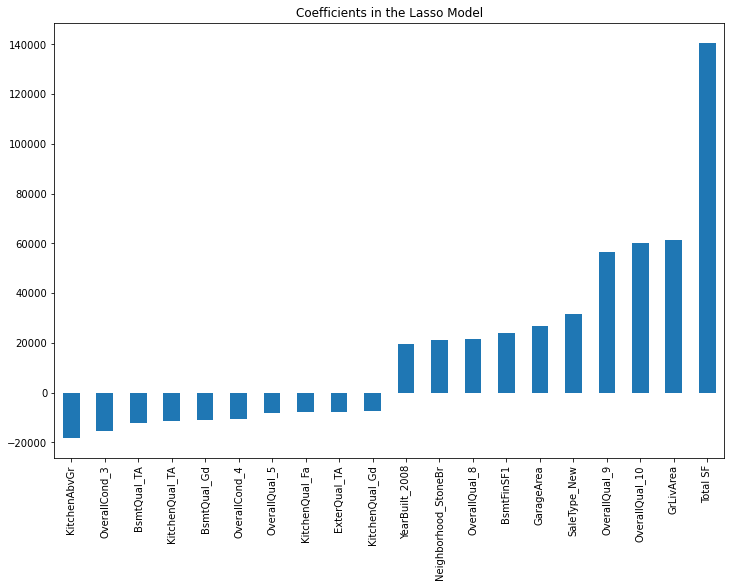

In [70]:
# Now plot the final variables
plt.figure(figsize=(12,8))
main_coef.plot(kind="bar")
plt.title("Coefficients in the Lasso Model")
